# Análisis Exploratorio - CineVision Studios

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")

file_path = "./movies.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

### Exploracion de los datos

In [4]:
print("\nExploración Rápida del Dataset")
print("="*50)

print("\nInformación general:")
display(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe())

print("\nValores nulos por columna:")
display(df.isnull().sum())



Exploración Rápida del Dataset

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   budget                     10000 non-null  int64  
 2   genres                     9947 non-null   object 
 3   homePage                   4193 non-null   object 
 4   productionCompany          9543 non-null   object 
 5   productionCompanyCountry   8720 non-null   object 
 6   productionCountry          9767 non-null   object 
 7   revenue                    10000 non-null  float64
 8   runtime                    10000 non-null  int64  
 9   video                      9514 non-null   object 
 10  director                   9926 non-null   object 
 11  actors                     9920 non-null   object 
 12  actorsPopularity           9913 non-null   object

None


Estadísticas descriptivas:


,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,249876.829300,1.855163e+07,5.673793e+07,100.268100,51.393907,6.483490,1342.381800,2.596500,3.171400,1.751000,2147.666600
std,257380.109004,3.662669e+07,1.495854e+08,27.777829,216.729552,0.984274,2564.196637,1.154565,2.539738,3.012093,37200.075802
min,5.000000,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12286.500000,0.000000e+00,0.000000e+00,90.000000,14.577750,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000
50%,152558.000000,5.000000e+05,1.631245e+05,100.000000,21.905500,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000
75%,452021.750000,2.000000e+07,4.479661e+07,113.000000,40.654000,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000
max,922260.000000,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000



Valores nulos por columna:


id                              0
budget                          0
genres                         53
homePage                     5807
productionCompany             457
productionCompanyCountry     1280
productionCountry             233
revenue                         0
runtime                         0
video                         486
director                       74
actors                         80
actorsPopularity               87
actorsCharacter                47
originalTitle                   0
title                           0
originalLanguage                0
popularity                      0
releaseDate                     0
voteAvg                         0
voteCount                       0
genresAmount                    0
productionCoAmount              0
productionCountriesAmount       0
actorsAmount                    0
castWomenAmount                 0
castMenAmount                   0
dtype: int64

# Clasificación de Variables en el Dataset

Clasificación de cada variable en el dataset, identificando si es cualitativa nominal, cualitativa ordinal, cuantitativa continua o cuantitativa discreta.

| **Variable**                | **Tipo**                       | **Descripción** |
|-----------------------------|--------------------------------|----------------|
| `id`                        | Cuantitativa Discreta          | Identificador único de la película |
| `budget`                    | Cuantitativa Continua          | Presupuesto de la película |
| `revenue`                   | Cuantitativa Continua          | Ingresos de la película |
| `runtime`                   | Cuantitativa Continua          | Duración en minutos |
| `popularity`                | Cuantitativa Continua          | Índice de popularidad de la película |
| `voteAvg`                   | Cuantitativa Continua          | Promedio de votos de los usuarios |
| `voteCount`                 | Cuantitativa Discreta          | Número total de votos |
| `genresAmount`              | Cuantitativa Discreta          | Cantidad de géneros asignados a la película |
| `productionCoAmount`        | Cuantitativa Discreta          | Cantidad de compañías productoras |
| `productionCountriesAmount` | Cuantitativa Discreta          | Cantidad de países involucrados en la producción |
| `actorsAmount`              | Cuantitativa Discreta          | Número total de actores en la película |
| `castWomenAmount`           | Cuantitativa Discreta          | Número total de actrices en la película |
| `castMenAmount`             | Cuantitativa Discreta          | Número total de actores en la película |
| `genres`                    | Cualitativa Nominal            | Género de la película |
| `homePage`                  | Cualitativa Nominal            | Página oficial de la película |
| `productionCompany`         | Cualitativa Nominal            | Compañía productora |
| `productionCompanyCountry`  | Cualitativa Nominal            | País de la compañía productora |
| `productionCountry`         | Cualitativa Nominal            | País donde se realizó la producción |
| `video`                     | Cualitativa Nominal            | Indica si tiene video promocional |
| `releaseDate`               | Cualitativa Ordinal            | Fecha de lanzamiento de la película |




### Distribución normal (Variables cuantitativas)

A continuación, la evaluación de las siguientes variables cuantitativas que han sido clasificadas para verificar si su distribución es normal son:
- Popularity
- Budget
- Revenue
- Runtime
- Genres Amount
- ProductionCo Amount
- Production Countries Amount
- Vote Count
- Vote Average
- Actors Popularity
- Actors Amount
- Cast Women Amount
- Cast Men Amount

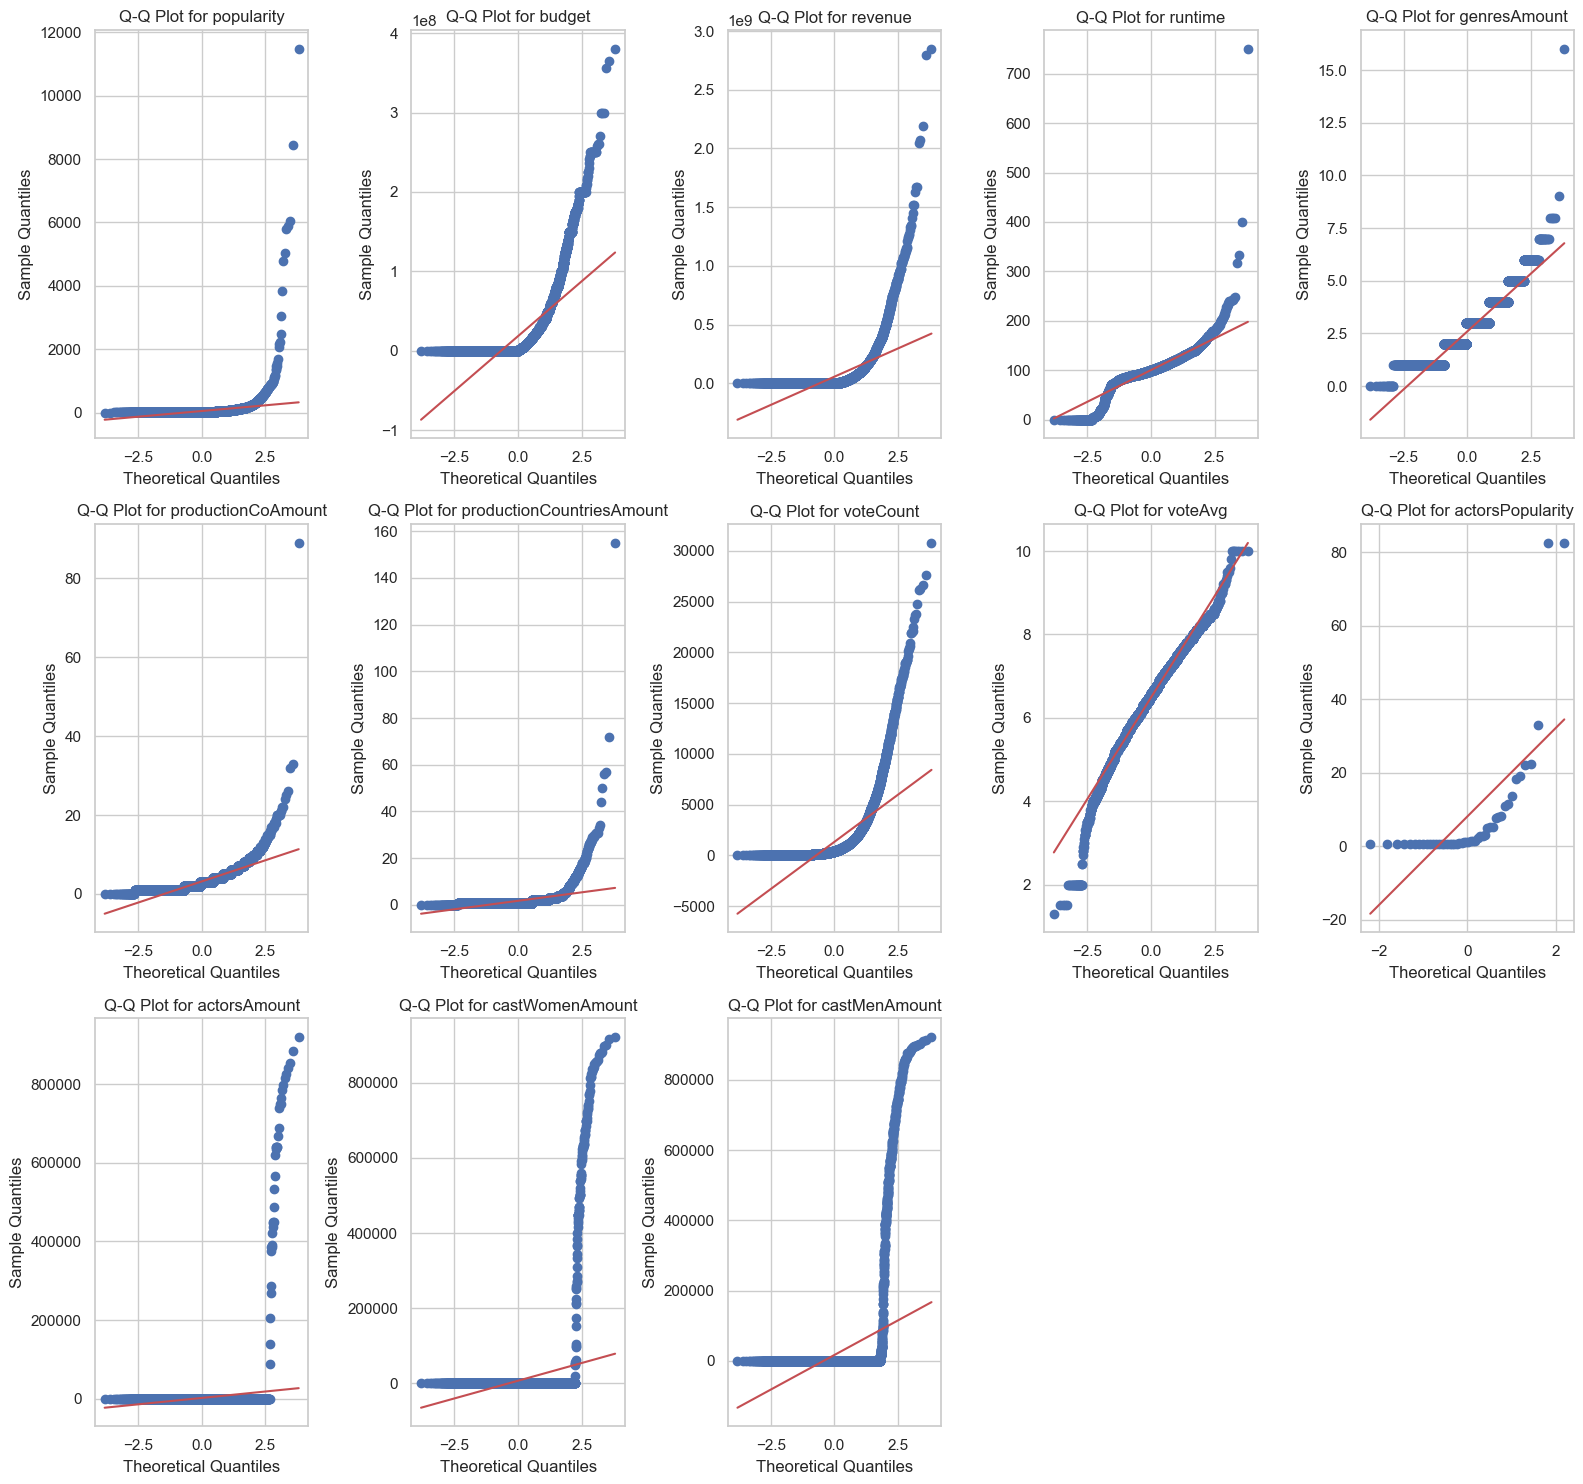

In [47]:
def create_qqplot_grid(data, variables, ncols=5, fig_size=(16, 15)):
    nrows = (len(variables) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=fig_size)
    axes = axes.flatten()
    
    for i, variable in enumerate(variables):
        stats.probplot(data[variable].dropna(), dist="norm", plot=axes[i])
        axes[i].set_title(f'Q-Q Plot for {variable}')
        axes[i].set_xlabel('Theoretical Quantiles')
        axes[i].set_ylabel('Sample Quantiles')
        axes[i].grid(True)
    
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

quantitative_vars = [
    'popularity', 'budget', 'revenue', 'runtime', 
    'genresAmount', 'productionCoAmount', 'productionCountriesAmount',
    'voteCount', 'voteAvg', 'actorsPopularity', 'actorsAmount',
    'castWomenAmount', 'castMenAmount'
]

df['castWomenAmount'] = pd.to_numeric(df['castWomenAmount'], errors='coerce')
df['castMenAmount'] = pd.to_numeric(df['castMenAmount'], errors='coerce')

create_qqplot_grid(df, quantitative_vars)

### Conclusión de análisis con Q-Q Plot
En general, ninguno de los datos cuantitativos cuentan con una distribución normal, la variable que más se aproxima a una distribución normal es la variable de **VoteAVG** la cual parece tener seguir la diagonal con un ligero sesgo, que a considereación no cuenta con una distribución normal.



***

### Tabla de frencuencia (Variables cualitativas)
Las siguientes variables son analizada de manera cualitativa con una tabla de frencuencias, dichas variables son las siguientes:
- original_title
- originalLanguage
- title
- homePage
- video
- director
- genres
- productionCompany
- productionCompanyCountry
- productionCountry
- releaseDate
- actors
- actorsCharacter

In [49]:
qualitative_vars = [
    "original_title", "originalLanguage", "title", "homePage", "video", "director", "genres",
    "productionCompany", "productionCompanyCountry", "productionCountry", "releaseDate", "actors",
    "actorsCharacter"
]

qualitative_vars = [var for var in qualitative_vars if var in df.columns]

def process_categorical_data(df, column):
    df[column] = df[column].astype(str).str.strip()
    df[column] = df[column].replace("nan", pd.NA).dropna()
    
    if df[column].str.contains(r'\|', regex=True).any():
        all_values = df[column].str.split('|').explode()
        return all_values.value_counts()
    else:
        return df[column].value_counts()

def generate_frequency_tables(df, qualitative_vars):
    frequency_tables = {}
    for var in qualitative_vars:
        frequency_tables[var] = process_categorical_data(df, var)
    return frequency_tables

tables = generate_frequency_tables(df, qualitative_vars)

for var, table in tables.items():
    print(f"Tabla de frecuencia para {var}:")
    print(table.head(), "\n")

Tabla de frecuencia para originalLanguage:
originalLanguage
en    7772
ja     644
es     425
fr     271
ko     167
Name: count, dtype: int64 

Tabla de frecuencia para title:
title
Pinocchio      4
Cinderella     4
Carrie         3
The Courier    3
Awake          3
Name: count, dtype: int64 

Tabla de frecuencia para homePage:
homePage
http://www.naruto-movie.com/        6
http://www.thehungergames.movie/    4
http://www.p3m.jp/                  3
http://www.kungfupanda.com/         3
http://kizumonogatari-usa.com/      3
Name: count, dtype: int64 

Tabla de frecuencia para video:
video
False    9430
True       84
Name: count, dtype: int64 

Tabla de frecuencia para director:
director
Steven Spielberg    30
Clint Eastwood      28
Ridley Scott        23
Sam Liu             22
Robert Rodriguez    21
Name: count, dtype: int64 

Tabla de frecuencia para genres:
genres
Drama        3789
Comedy       3018
Action       2632
Thriller     2565
Adventure    1769
Name: count, dtype: int64 

Tabla

### Conclusión de tablas de frecuencias

**originalLanguage:**

La mayoría de las películas están en inglés (7772), seguidas por japonés (644) y español (425).

**title:**

Los títulos más comunes son "Pinocchio" y "Cinderella" con 4 apariciones cada uno, seguidos por "Carrie", "The Courier" y "Awake" con 3 apariciones cada uno.

**homePage:**

Las páginas de inicio más frecuentes son "http://www.naruto-movie.com/" (6), "http://www.thehungergames.movie/" (4), y "http://www.p3m.jp/" (3).

**video:**

La mayoría de las películas no tienen video asociado (9430), mientras que solo 84 sí tienen.

**director:**

Los directores más frecuentes son Steven Spielberg (30), Clint Eastwood (28), y Ridley Scott (23).

**genres:**

Los géneros más comunes son Drama (3789), Comedia (3018), y Acción (2632).

**productionCompany:**

Las compañías de producción más frecuentes son Warner Bros. Pictures (480), Universal Pictures (466), y Columbia Pictures (347).

**productionCompanyCountry:**

La mayoría de las compañías de producción están en Estados Unidos (12675), seguidas por Japón (1604) y Francia (1478).

**productionCountry:**

Los países de producción más comunes son Estados Unidos (6788), Reino Unido (1171), y Japón (731).

**releaseDate:**

Las fechas de lanzamiento más comunes son 2021-10-08 y 2021-02-12 con 15 películas cada una, seguidas por 2021-10-01 con 14 películas.

**actors:**

Los actores más frecuentes son "FALSE" (480), Frank Welker (143), y Grey DeLisle (97).

**actorsCharacter:**

Los personajes más comunes son "Self" (1723), "Additional Voices (voice)" (1566), y "Himself" (1445).

***